In [1]:
from music21 import *
import music21
import copy
import pickle
import random

In [2]:
accompany_file = open('accompany_dict.pickle','rb')
accompany_dict = pickle.load(accompany_file)
accompany_file.close()

co_occurance_file = open('co_occurance_dict.pickle','rb')
co_occurance_dict = pickle.load(co_occurance_file)
co_occurance_file.close()

In [3]:
list(accompany_dict.items())[0][0]

('B4', 'quarter')

In [4]:
file = 'test_xml_data/一首簡單的歌_主旋律.musicxml'
score = music21.converter.parse(file)
key = score.analyze('key')
print('Original key: ', key.tonic.name, key.mode)
 

Original key:  F major


score-> part -> pitches -> 

In [5]:
type_num_dict = {'quarter':0.25, 'half': 0.5, 'eighth': 0.125, '16th': 0.0625,'whole':1}

In [6]:
random.seed()
combination_dict = {'quarter':('eighth','eighth'),
                    'half':('quarter','quarter'),
                   'eighth':('16th','16th'),
                    'whole':('half','half')}


In [7]:
def choose_type(note_type):
    need_split = [1] ## initial
    note_type_lst = [note_type]
    while sum(need_split) != 0:
        new_note_type_lst = []
        new_need_split = []
        for index,type_ in enumerate(note_type_lst):
            if(type_ == '16th'):
                new_need_split.append(0)
                new_note_type_lst.append(type_)
            else:
                rand_num = random.randint(0,1)
                if(rand_num == 1):
                    new_need_split.append(1)
                    new_need_split.append(1)
                    new_note_type_lst.append(combination_dict[type_][0])
                    new_note_type_lst.append(combination_dict[type_][1])
                else:
                    new_need_split.append(0)
                    new_note_type_lst.append(type_)
        need_split = new_need_split.copy()
        note_type_lst = new_note_type_lst.copy()
    return note_type_lst

In [8]:
def filter_accord_next_pitch(candidate_lst, next_pitch):
    result = []
    for candidate, freq in candidate_lst:
        if(candidate in accompany_dict):
            temp = [note for note, freq in accompany_dict[candidate]]
            find_result = [note for note, freq in accompany_dict[candidate].items() if note[0] == next_pitch]
            if(len(find_result) > 0):
                result.append(candidate)
    return result

In [9]:
def check_table(pitch_type_lst):
    new_note_lst = []
    for index in range(len(pitch_type_lst)):
        note_pitch,type_ = pitch_type_lst[index]
        if(index == len(pitch_type_lst)-1 or type_ == '16th'):
            new_note_lst.append((note_pitch,type_))
            break
        ### change type ###
        if(random.randint(0,1) == 1):
            next_pitch = pitch_type_lst[index+1][0]
        
            new_type, next_type = combination_dict[type_]
            if((note_pitch, new_type) in co_occurance_dict):
                candidate_lst = sorted([(note, freq) for note, freq in co_occurance_dict[(note_pitch, new_type)].items() if(note[1] == next_type and note[0] != next_pitch and note[0] != note_pitch)],
                                    key = lambda x:x[1], reverse=True)
                ### filter candidate accord the next pitch ###
                candidate_lst = filter_accord_next_pitch(candidate_lst, next_pitch)
                if(len(candidate_lst) != 0):
#                     print(candidate_lst)
                    new_note_lst.append((note_pitch,new_type))
                    new_note_lst.append((candidate_lst[0]))
                else:
                    new_note_lst.append((note_pitch,type_))
            else:
                new_note_lst.append((note_pitch,type_))
        else:
            new_note_lst.append((note_pitch,type_))
        
    return new_note_lst   
            

In [19]:
score = converter.parse('test_xml_data/Jingle_Bells/lg-35688787.xml')
parts = instrument.partitionByInstrument(score)
note_list = []
for music_instrument in range(len(parts)):
    for element_by_offset in stream.iterator.OffsetIterator(parts[music_instrument]):
        for entry in element_by_offset:
            if isinstance(entry, note.Note):
                note_list.append((str(entry.pitch),entry.duration.type))
            elif isinstance(entry, note.Rest):
                note_list.append(('Rest',entry.duration.type))
total = 0
pitch_type_lst = []
new_score = []
for pitch, type_ in note_list:
    total += type_num_dict[type_]
    pitch_type_lst.append((pitch,type_))
    if(total >= 1):
        new_score.append(check_table(pitch_type_lst))
        total = 0
        pitch_type_lst = []
if(len(pitch_type_lst)!=0):
    new_score.append(check_table(pitch_type_lst))
    

In [20]:
# new_score

In [21]:
part_main = stream.Part()
for one_measure in new_score:
    Treble_measure = stream.Measure() 
    for measure_index in range(len(one_measure)):
        right_note_pitch, right_note_type = one_measure[measure_index]
        if(right_note_pitch == 'Rest'):
            Treble_measure.append(note.NotRest(type=right_note_type))
        else:
            Treble_measure.append(note.Note(right_note_pitch, type=right_note_type))
    part_main.append(Treble_measure)
    
    

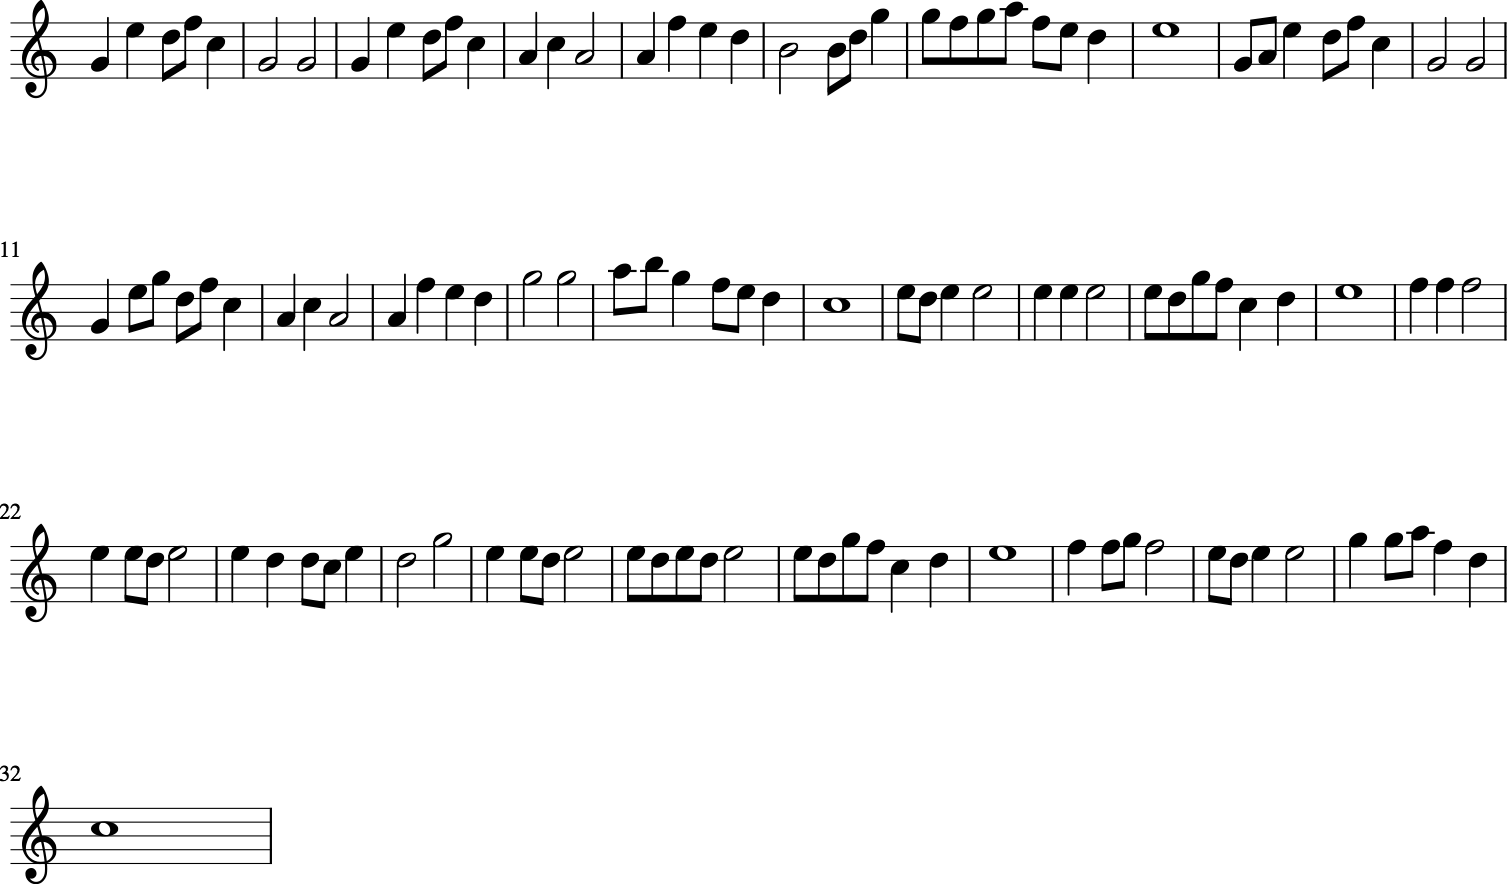

In [22]:
part_main.show()

In [13]:
### change ###
part_main.show('midi')


In [15]:
### write file into mid file ###
part_main.write('midi',fp=r'partC_12_31.mid')

'partC_12_31.mid'

In [18]:
part_main.write('xml',fp=r'partC_12_31.xml')

'/Users/lisalan/Desktop/AI_music/partC_12_31.xml'

In [14]:
### original ###

score.show('midi')

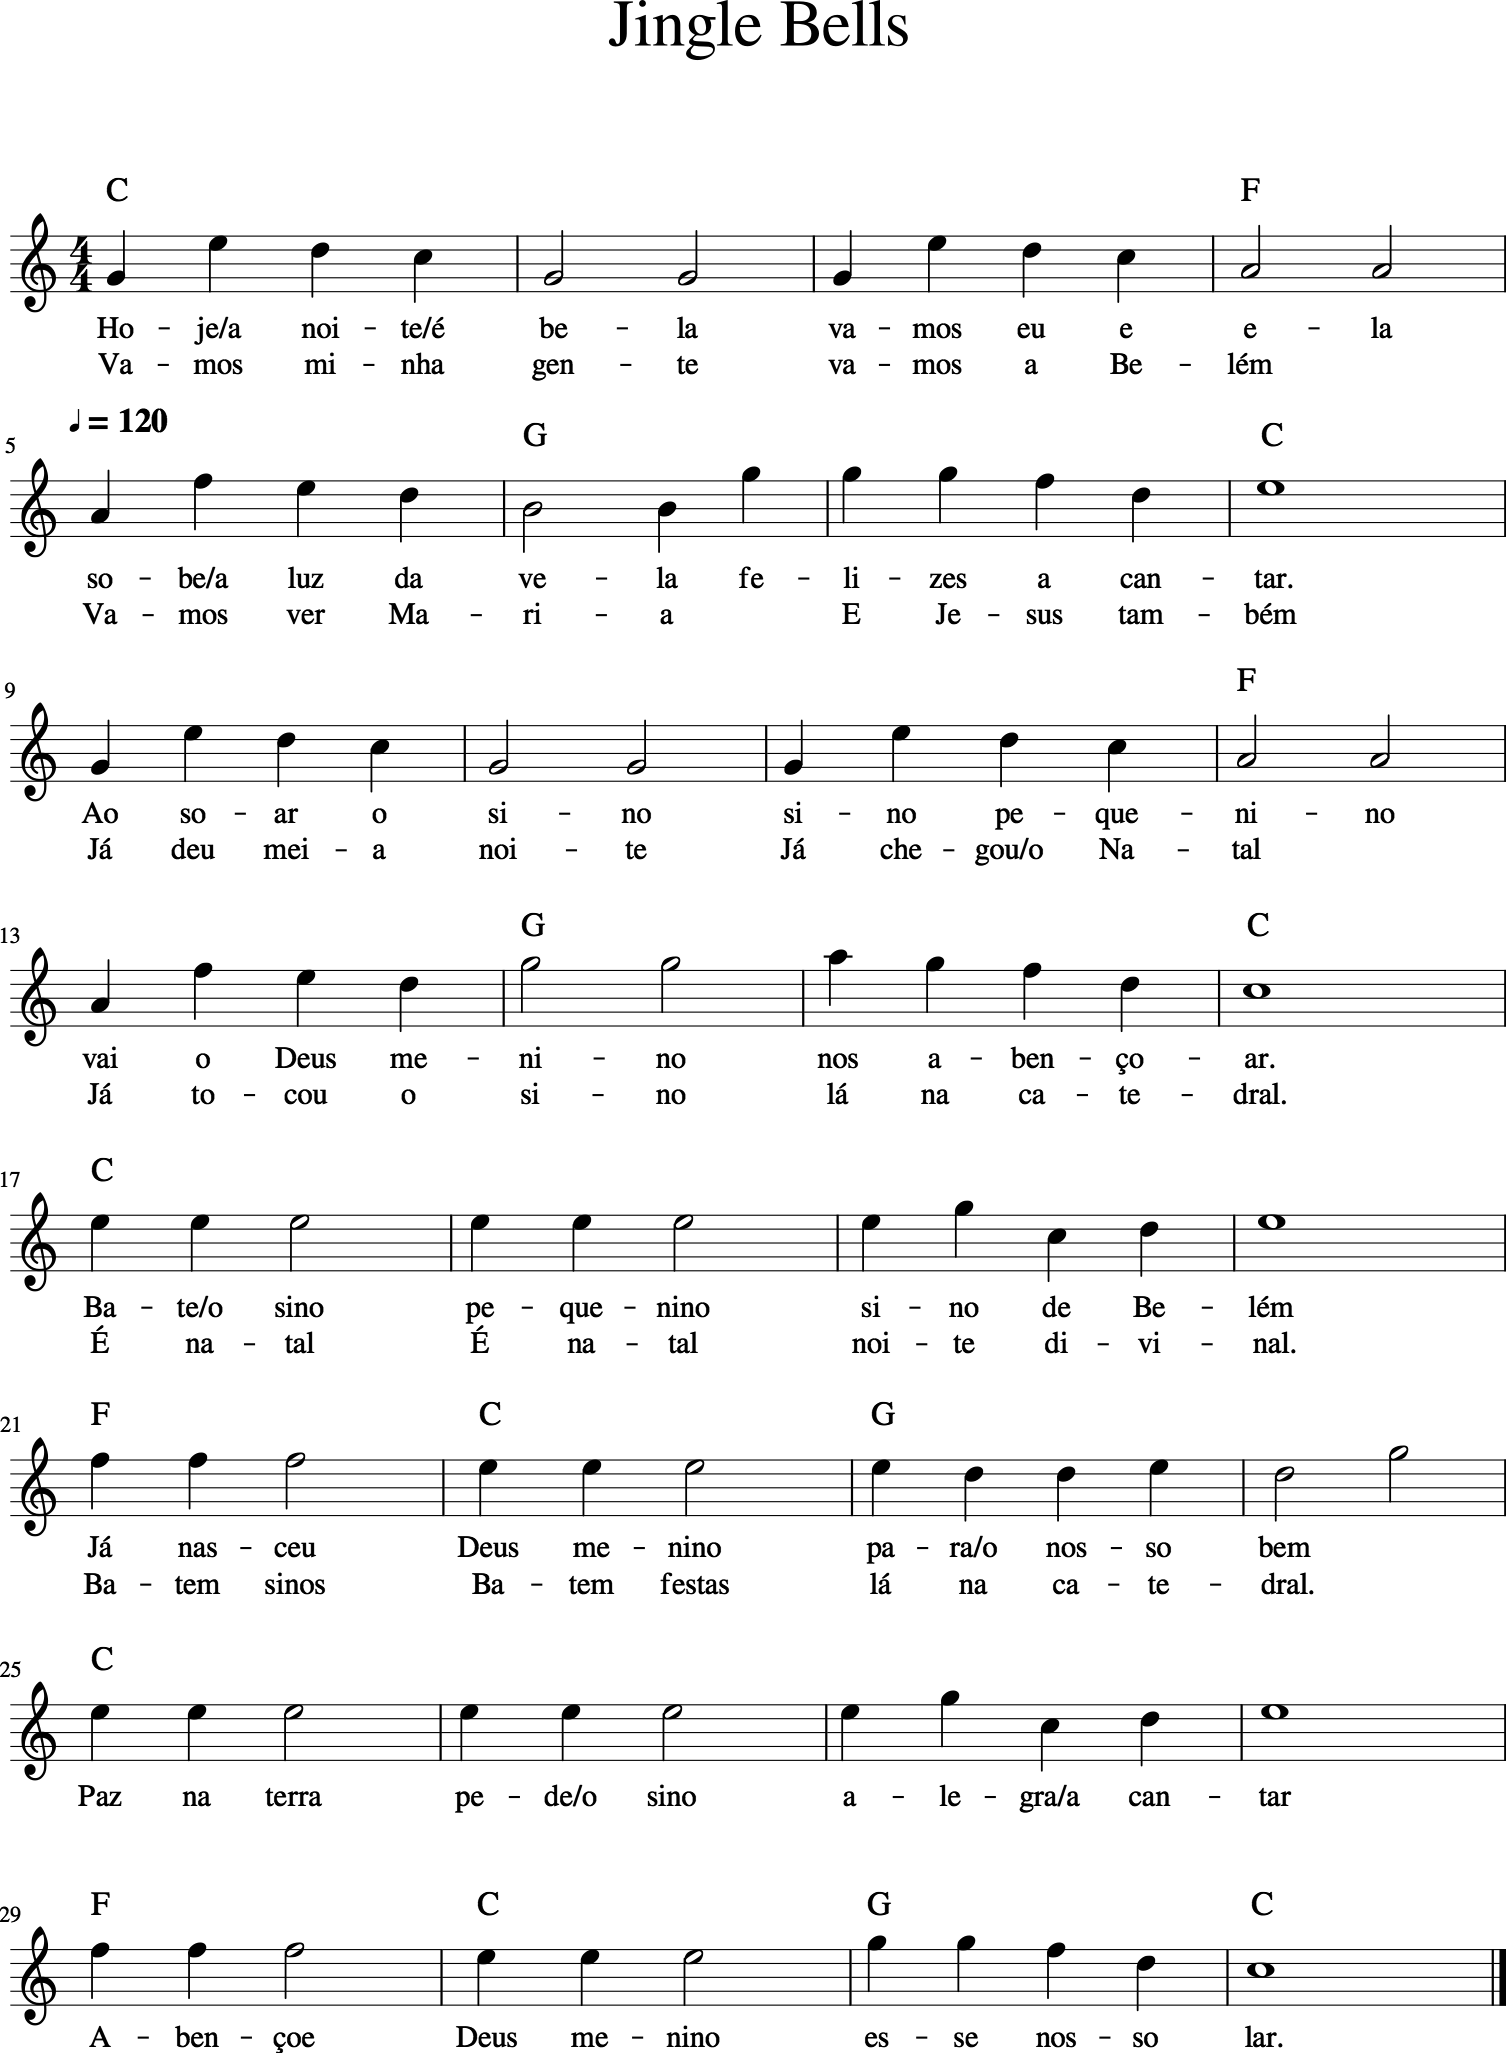

In [23]:
score.show()

------------